# 3.3 Datenvisualisierung Python
## Histogram, Boxplot, Violinplot
### 27.04.2023


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

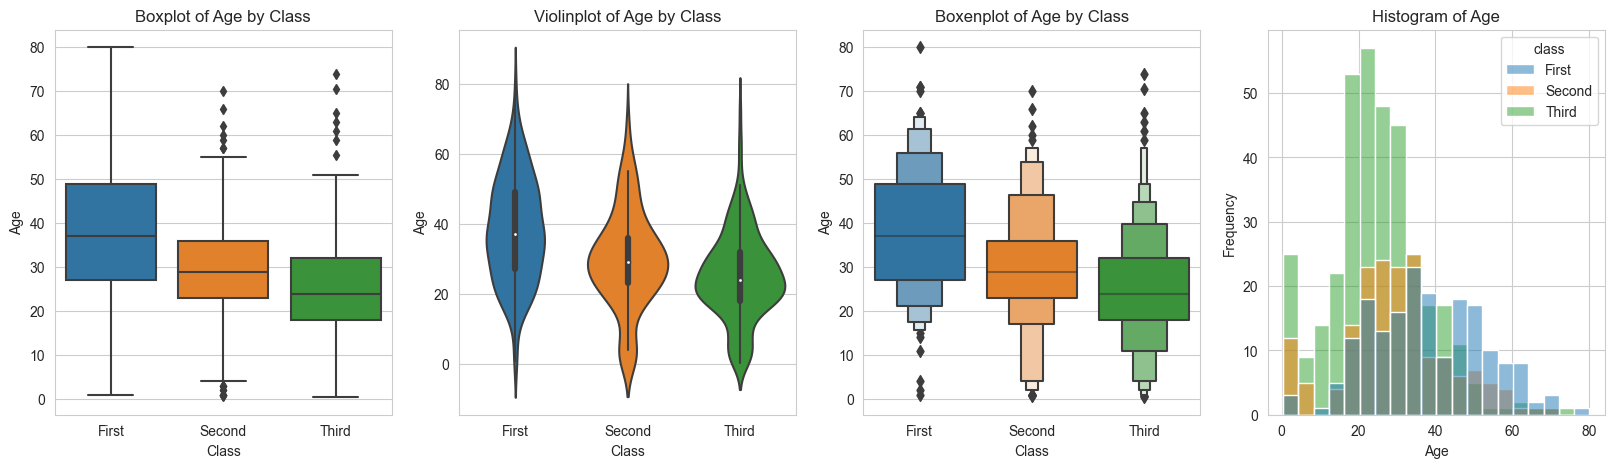

In [6]:
#Unser Ziel für heute:
from PIL import Image
Image.open("20230427_3.3_Ziel.png")

In [2]:
#Unser Datensatz für heute
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Histogram

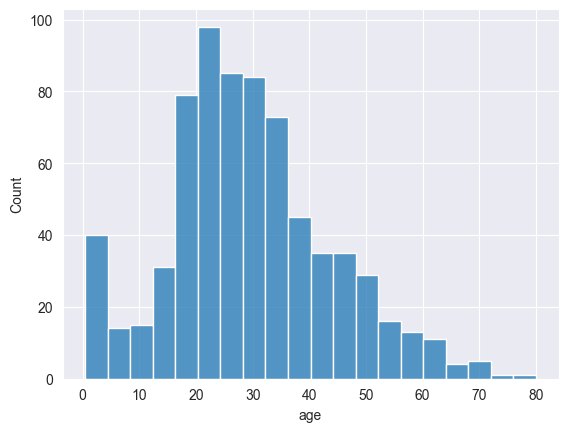

In [5]:
#Einfaches Histogram auf x
sns.histplot(data=df, x="age");

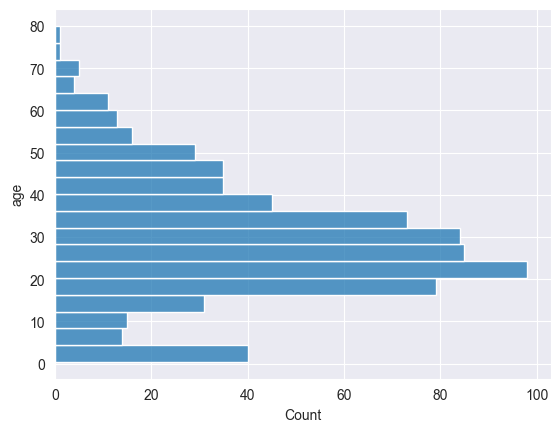

In [6]:
#Auf y
sns.histplot(data=df, y="age");

<Axes: xlabel='age', ylabel='Count'>

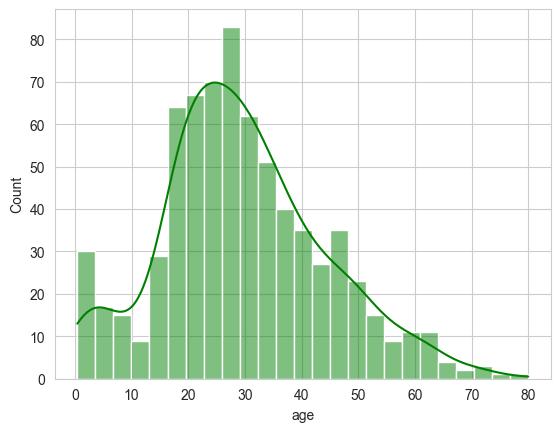

In [47]:
#Histogram mit bins und Verteilungsangabe
sns.histplot(data=df, x="age", bins=25, kde=True, color="green")

<Axes: xlabel='age', ylabel='Percent'>

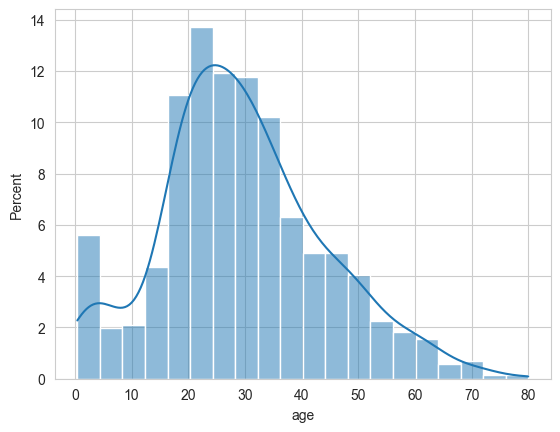

In [52]:
#Statt counts mit passender y-Achse
sns.histplot(data=df, x="age", stat="percent", kde=True)


<Axes: xlabel='age', ylabel='Count'>

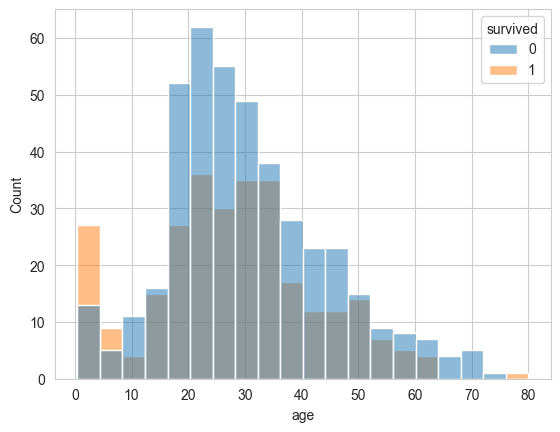

In [53]:
#Histogram von Gruppen
sns.histplot(data=df, x="age", hue="survived")

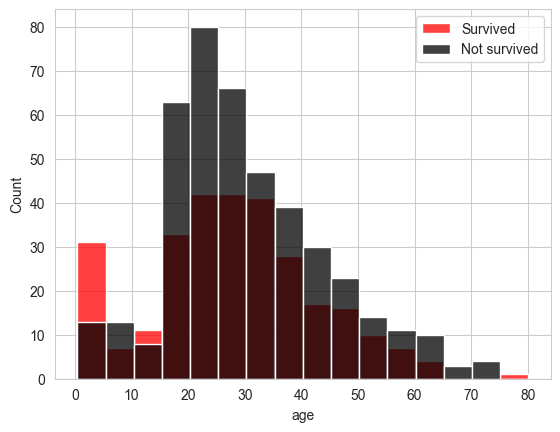

In [232]:
#Alternative
sns.histplot(data=df[df['survived']==1], x="age", color="red", label="Survived")
sns.histplot(data=df[df['survived']==0], x="age", color="black", binrange=(0.4, 80), binwidth=4.98, label="Not survived")
plt.legend()

<Axes: xlabel='age', ylabel='Count'>

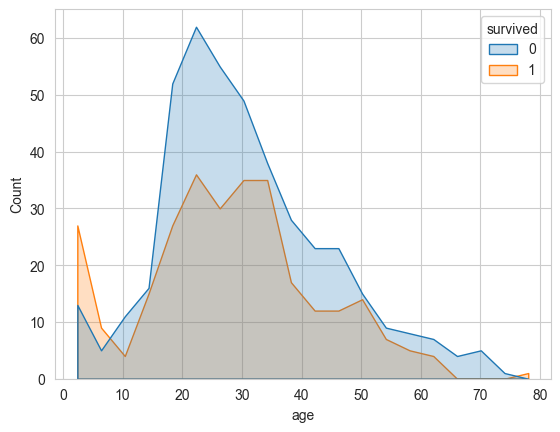

In [78]:
#Histogram von Gruppen, aber anderer Stil
sns.histplot(data=df, x="age", hue="survived", element="poly")

<Axes: xlabel='age', ylabel='Count'>

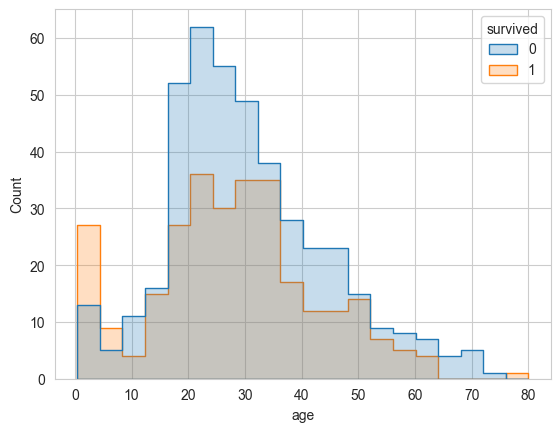

In [79]:
sns.histplot(data=df, x="age", hue="survived", element="step")

<Axes: xlabel='age', ylabel='Count'>

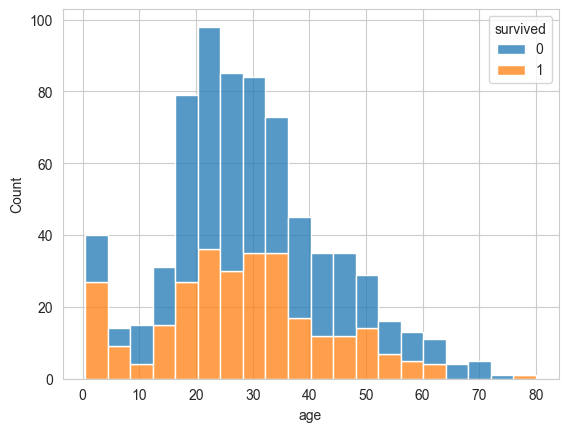

In [80]:
#Gruppen mit Multiple (Stacked Histplot)
sns.histplot(data=df, x="age", hue="survived", multiple="stack")

<Axes: xlabel='age', ylabel='Count'>

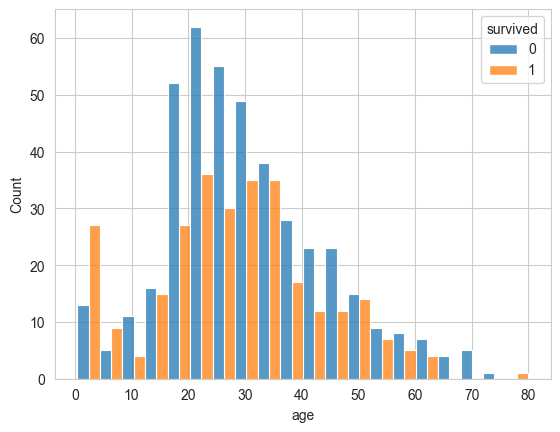

In [81]:
#Gruppen mit Multiple (Grouped Histplot)
sns.histplot(data=df, x="age", hue="survived", multiple="dodge")

<Axes: xlabel='age', ylabel='Percent'>

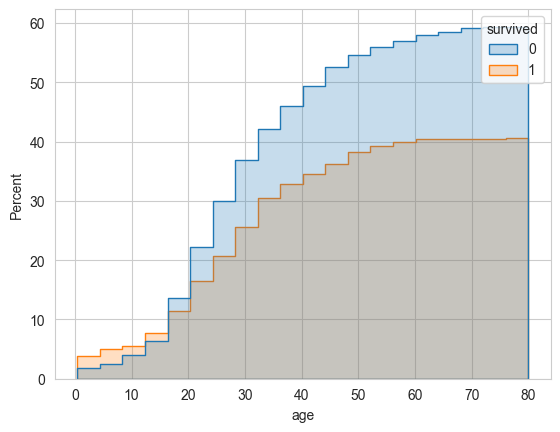

In [84]:
#Vergleich von Gruppen über kumulative Funktionen
sns.histplot(data=df, x="age", hue="survived", element="step", cumulative=True, stat="percent")

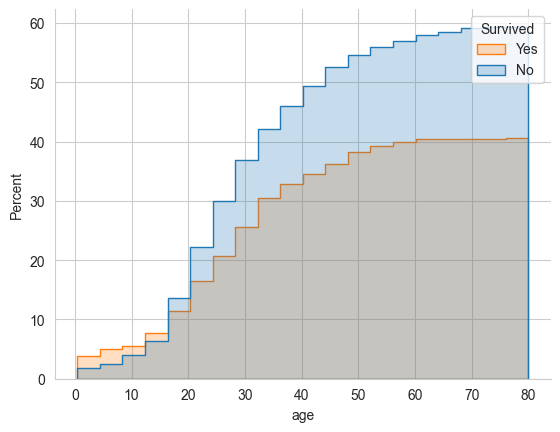

In [139]:
#Legende verändern und Gitter anpassen
ax = sns.histplot(data=df, x="age", hue="survived", element="step", cumulative=True, stat="percent")
ax.legend(labels=["Yes", "No"], title="Survived")
sns.despine(top=True)

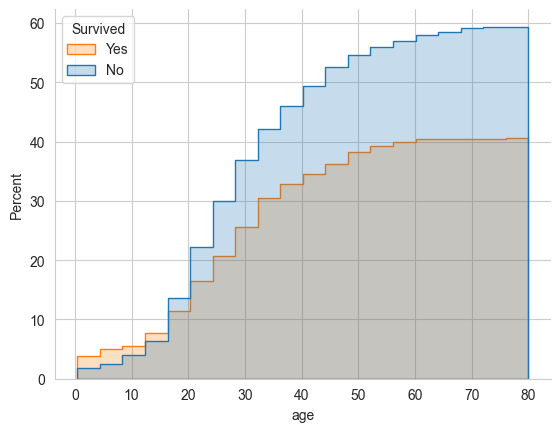

In [140]:
#Legende verschieben
ax = sns.histplot(data=df, x="age", hue="survived", element="step", cumulative=True, stat="percent")
ax.legend(labels=["Yes", "No"], title="Survived")
sns.despine(top=True)
sns.move_legend(ax, loc="upper left")

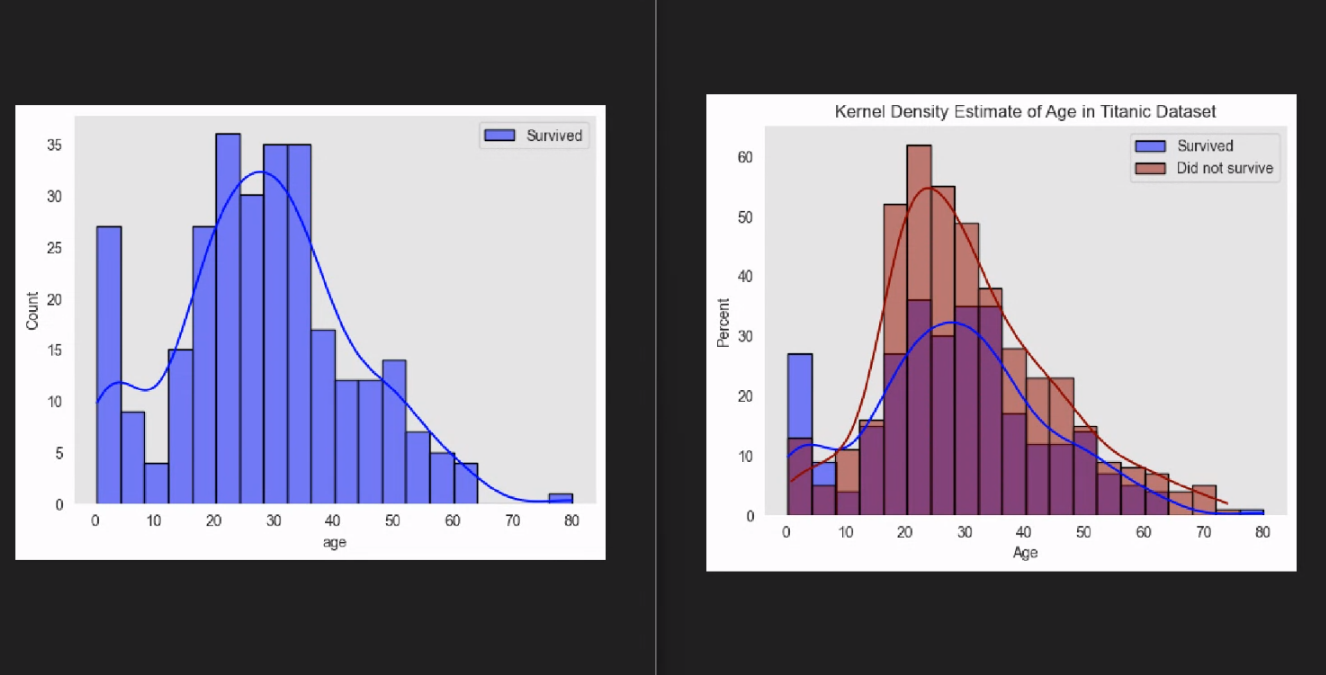

In [7]:
from PIL import Image
Image.open("1.png")

## Übungsaufgabe Histplot

### Erstelle die im Unterricht gezeigten Graphiken

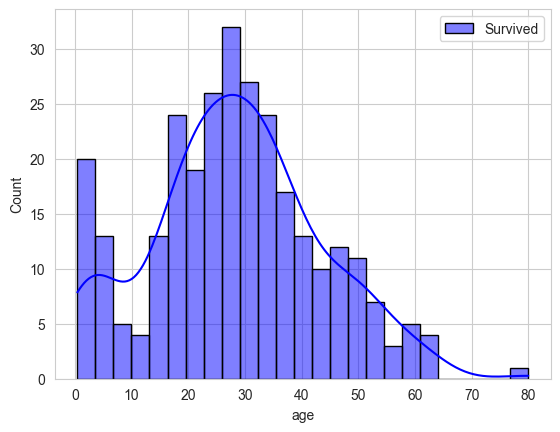

In [20]:
#Graphik 1
sns.histplot(data=df[df['survived']==1], x="age", bins=25, kde=True, color="blue",label="Survived",edgecolor='black')
plt.legend();

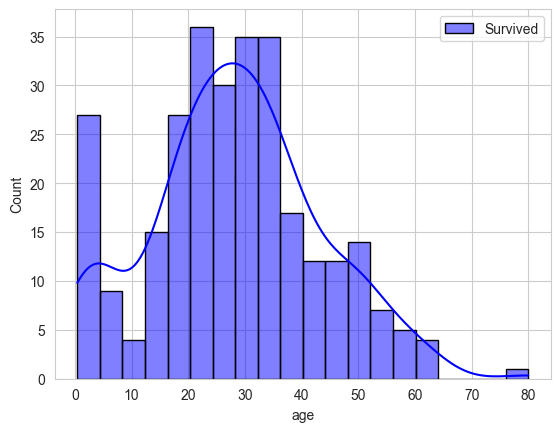

In [21]:
#Graphik 1
#Histogram erstellen
sns.histplot(df[df['survived'] == 1]['age'], kde=True, bins=20, color='blue', edgecolor='black', label='Survived')

#Legende einfügen
plt.legend()

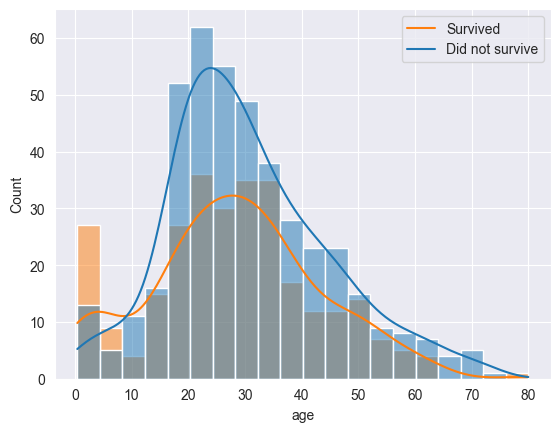

In [10]:
#Graphik 2
ax=sns.histplot(data=df, x="age", hue="survived",kde =True)
ax.legend(labels=["Survived", "Did not survive"] )

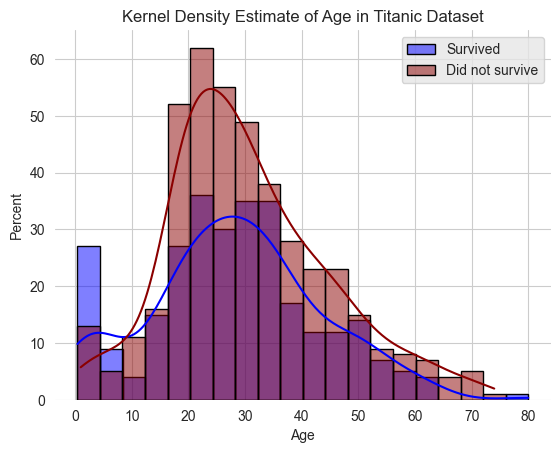

In [22]:
#Graphik 2
#Beide Ebenen vom Histogramm erstellen
sns.histplot(df[df['survived'] == 1]['age'], kde=True, bins=20, color='blue', edgecolor='black', label='Survived')
sns.histplot(df[df['survived'] == 0]['age'], kde=True, bins=20, color='darkred', edgecolor='black', label='Did not survive', alpha=0.5, binrange=(0.4, 80), binwidth=3.98)

#Äußeres Erscheinungsbild
sns.set_style("dark", {"axes.facecolor": ".9"})
sns.despine(left=True, bottom=True)
plt.title("Kernel Density Estimate of Age in Titanic Dataset")
plt.xlabel("Age")
plt.ylabel("Percent")

#Legende einfügen
plt.legend()

## Boxplot

In [14]:
sns.set_style("whitegrid")

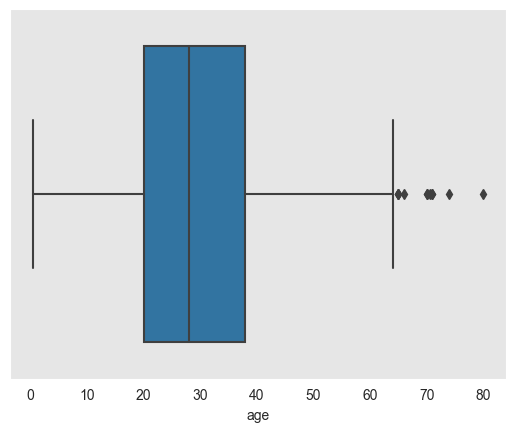

In [24]:
#Einfacher Boxplot
sns.boxplot(x=df["age"]);

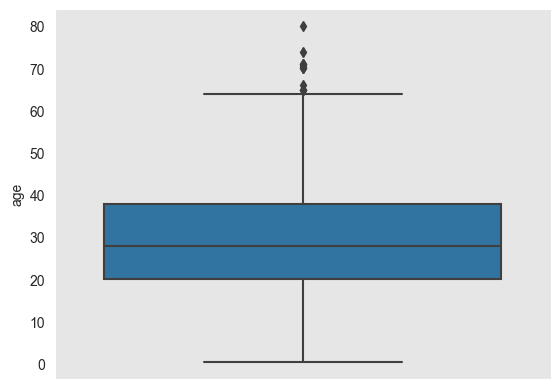

In [26]:
#Einfacher Boxplot
sns.boxplot(y=df["age"]);

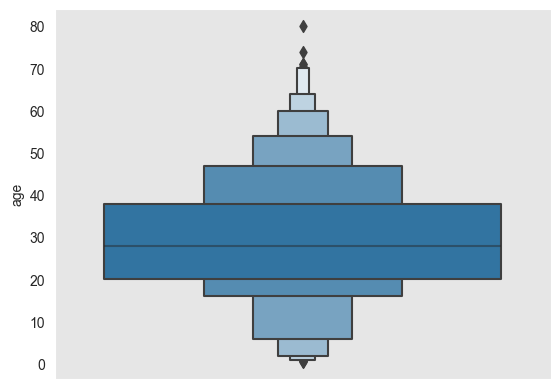

In [27]:
#Im Vergleich dazu: Der Boxenplot
sns.boxenplot(y=df["age"]);

<Axes: xlabel='age', ylabel='class'>

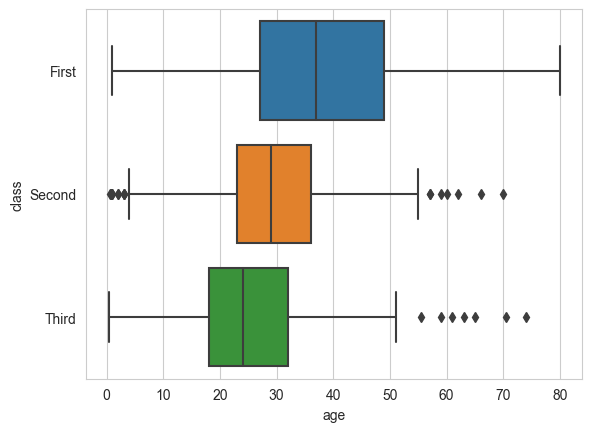

In [148]:
#Boxplot unterteilt in Klassen
sns.boxplot(data=df, x="age", y="class")

<Axes: xlabel='age', ylabel='class'>

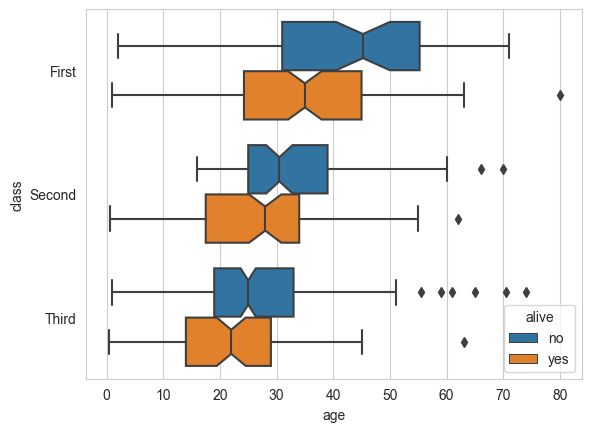

In [152]:
#Gruppierter Boxplot
sns.boxplot(data=df, x="age", y="class", hue="alive", notch=True)

[Text(0.5, 1.0, 'Survivors: age against class'),
 Text(0, 0.5, 'Class'),
 Text(0.5, 0, 'Age')]

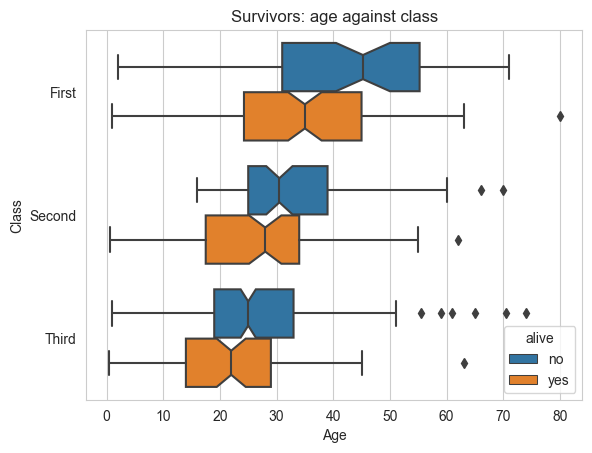

In [159]:
#Ändern des Erscheinungsbilds entweder über ax.set(title=...
ax = sns.boxplot(data=df, x="age", y="class", hue="alive", notch=True)
ax.set(title="Survivors: age against class", ylabel="Class", xlabel="Age")

Text(0.5, 0, 'Age')

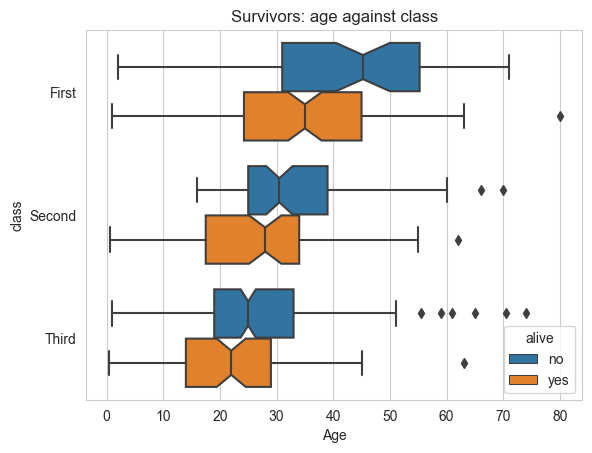

In [161]:
#oder über plt.title(...) usw.
sns.boxplot(data=df, x="age", y="class", hue="alive", notch=True)
plt.title("Survivors: age against class")
plt.xlabel("Age")

## Übungsaufgabe Boxplot

### Erstelle die im Unterricht gezeigten Graphiken

In [ ]:
#Graphik 1

In [ ]:
#Graphik 2

## Violinplot

<Axes: xlabel='fare'>

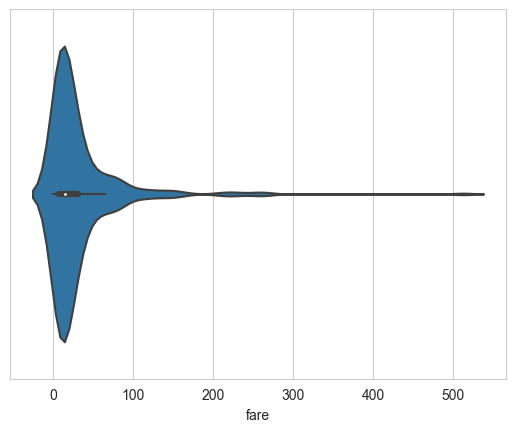

In [162]:
#Einfacher Violinplot - eine gemeinsame Familie mit Boxplot und Boxenplot
sns.violinplot(x=df["fare"])

<Axes: xlabel='fare', ylabel='class'>

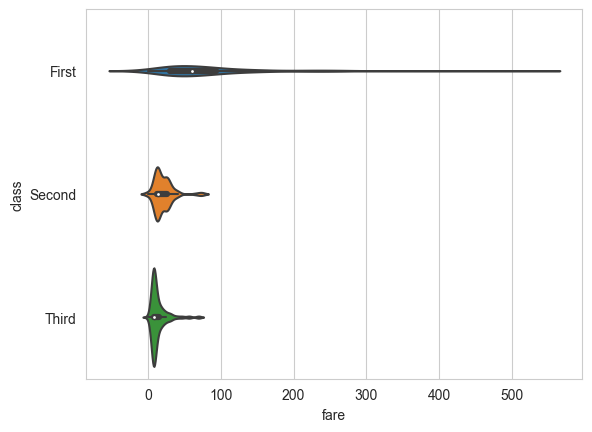

In [163]:
#Zusammen mit Gruppenvariable
sns.violinplot(data=df, x="fare", y="class")

<Axes: xlabel='fare', ylabel='class'>

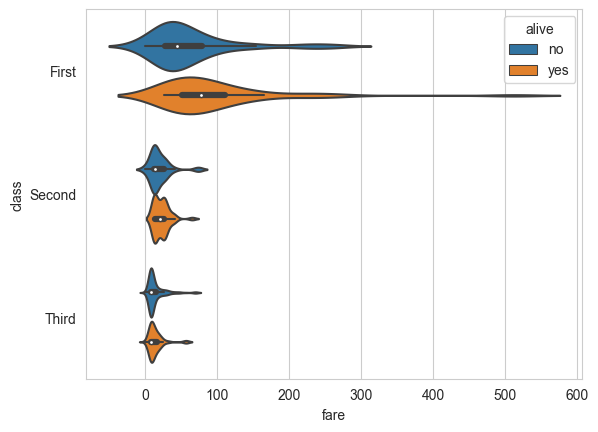

In [164]:
#Violinplot aufgetrennt in weitere Gruppen
sns.violinplot(data=df, x="fare", y="class", hue="alive", split=False)

<Axes: xlabel='fare', ylabel='class'>

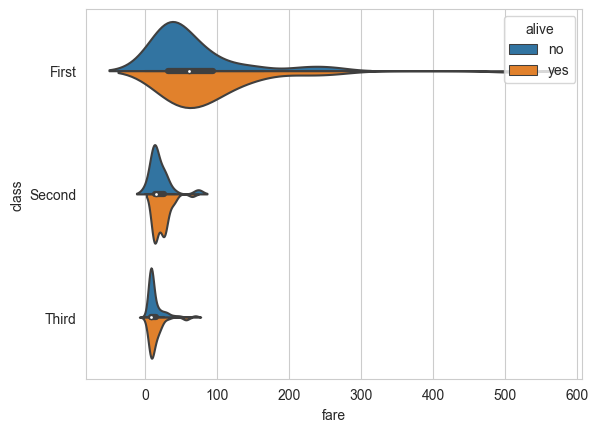

In [165]:
#Violinplot mit split
sns.violinplot(data=df, x="fare", y="class", hue="alive", split=True)

<Axes: xlabel='age', ylabel='class'>

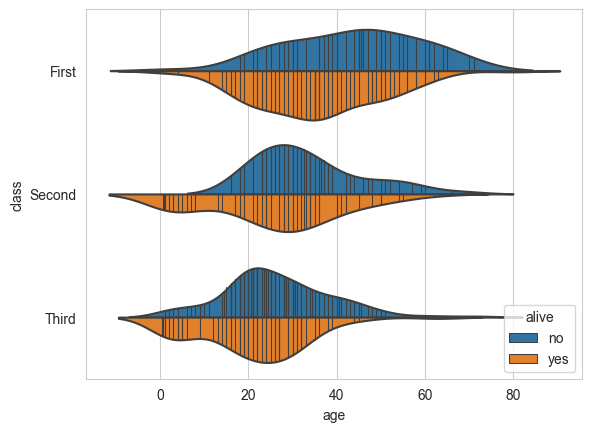

In [169]:
#Und zuletzt jede einzelne Beobachtung zusätzlich darstellen!
sns.violinplot(data=df, x="age", y="class", hue="alive", split=True, inner="stick")

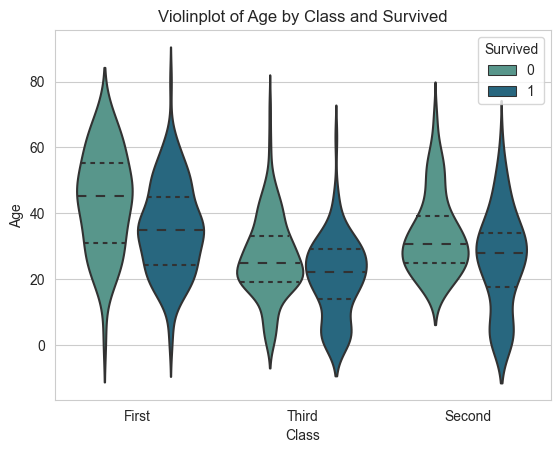

In [185]:
#Beispiel
#Violinplot erstellen
sns.violinplot(x="class", y="age", hue="survived", data=df, order=["First", "Third", "Second"], palette="crest", linewidth=1.5, inner="quartile", saturation=0.8)

#Erscheinungsbild ändern
plt.title("Violinplot of Age by Class and Survived")
plt.xlabel("Class")
plt.ylabel("Age")
plt.legend(title="Survived")

[Text(0.5, 1.0, 'Age distribution of passengers')]

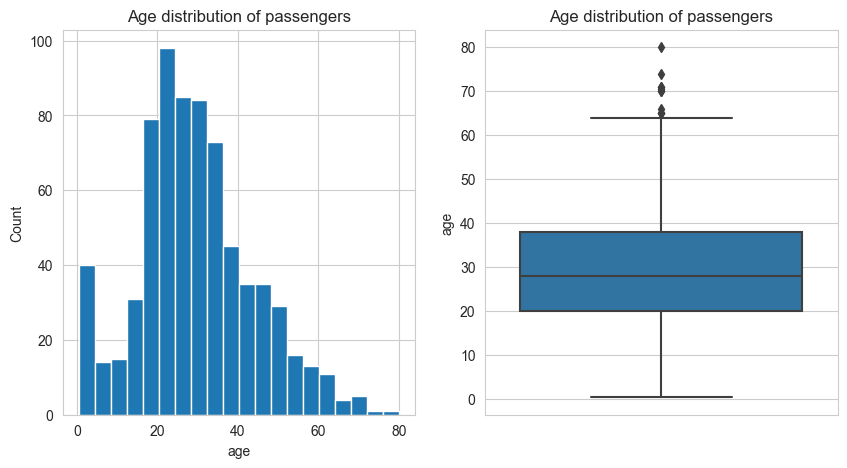

In [223]:
#Subplots erstellen
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.histplot(data=df, x="age", alpha=1, ax=ax[0])
ax[0].set(title="Age distribution of passengers")

sns.boxplot(data=df, y="age", ax=ax[1])
ax[1].set(title="Age distribution of passengers")

## Und jetzt alles kombiniert!

(0.0, 81.0)

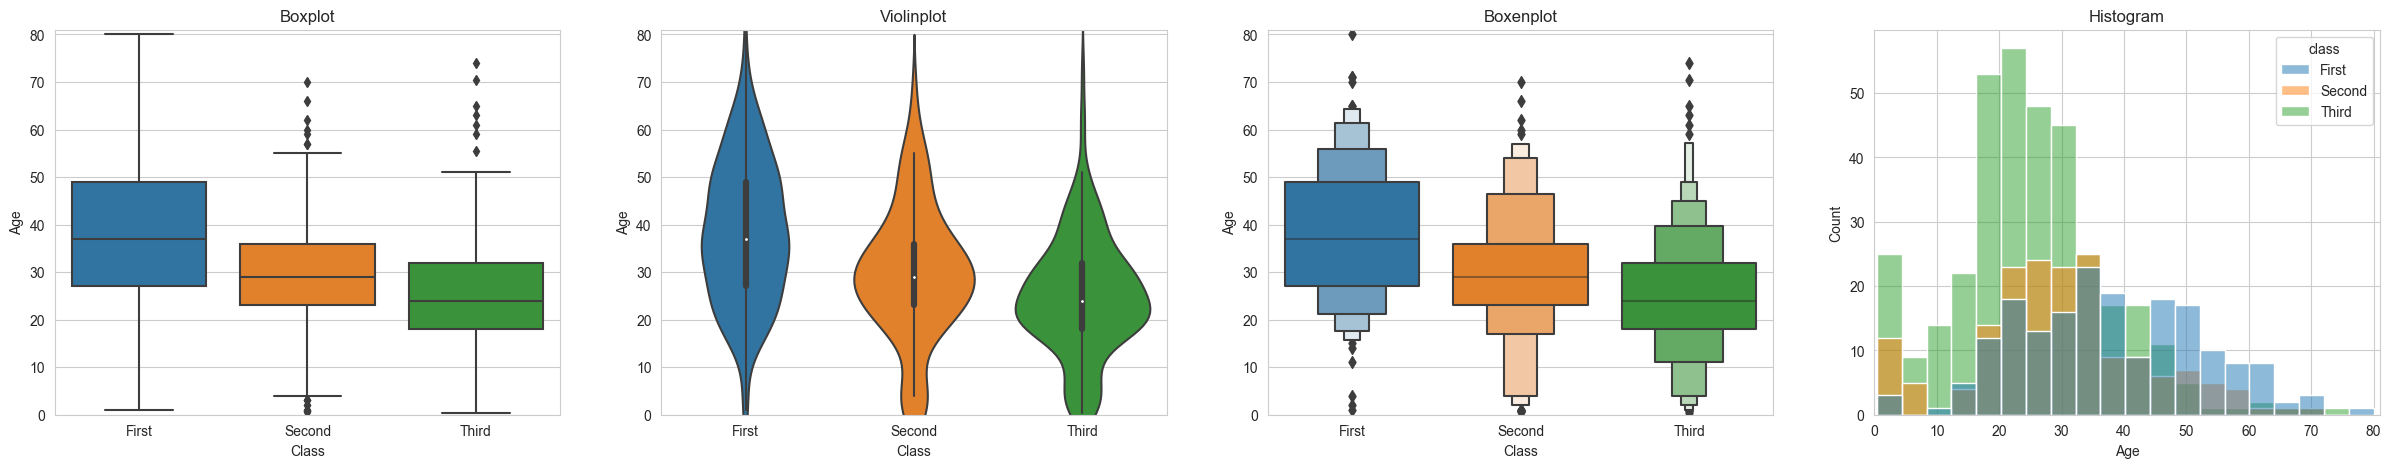

In [217]:
#Erstellen des Subplots
fig, ax = plt.subplots(1,4, figsize=(30,5))

#Boxplot auf Position 1 (oder 0 in Python)
sns.boxplot(x="class", y="age", data=df, ax=ax[0])
ax[0].set_title("Boxplot")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Age")
ax[0].set_ylim([0,81])

#Violinplot auf Position 2
sns.violinplot(x="class", y="age", data=df, ax=ax[1])
ax[1].set_title("Violinplot")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Age")
ax[1].set_ylim([0,81])

#Boxenplot auf Position 3
sns.boxenplot(x="class", y="age", data=df, ax=ax[2])
ax[2].set_title("Boxenplot")
ax[2].set_xlabel("Class")
ax[2].set_ylabel("Age")
ax[2].set_ylim([0,81])

#Histogram auf Position 4
sns.histplot(hue="class", x="age", data=df, ax=ax[3])
ax[3].set_title("Histogram")
ax[3].set_xlabel("Age")
ax[3].set_ylabel("Count")
ax[3].set_xlim([0,81])


## Übungsaufgabe Subplots

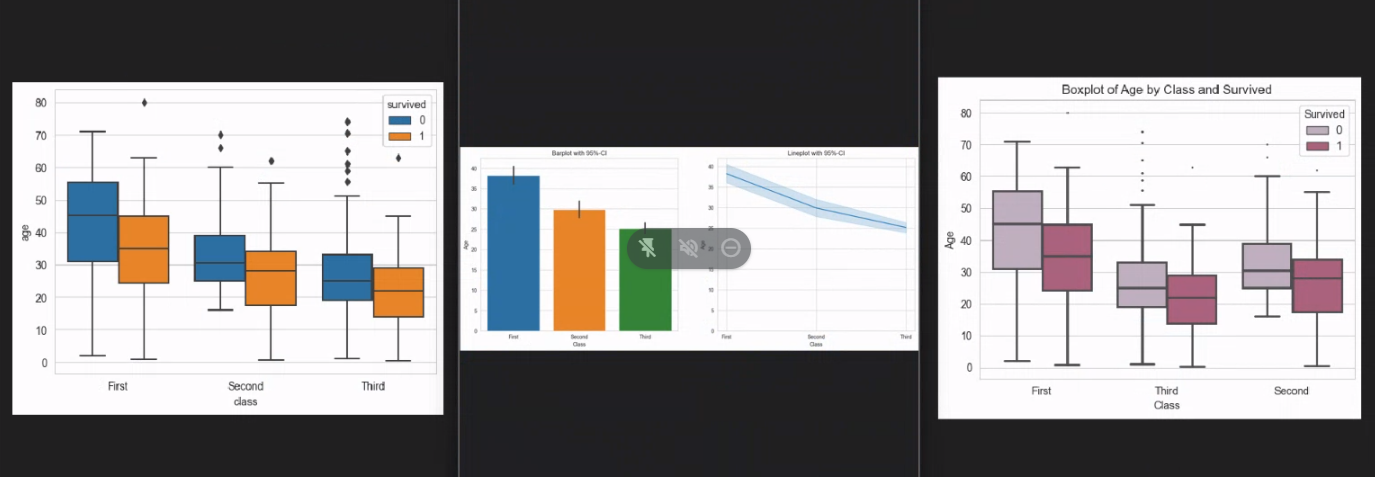

In [28]:
from PIL import Image
Image.open("2.png")

### Erstelle die im Unterricht gezeigten Graphiken

## 2x3 Grafik!

(0.0, 81.0)

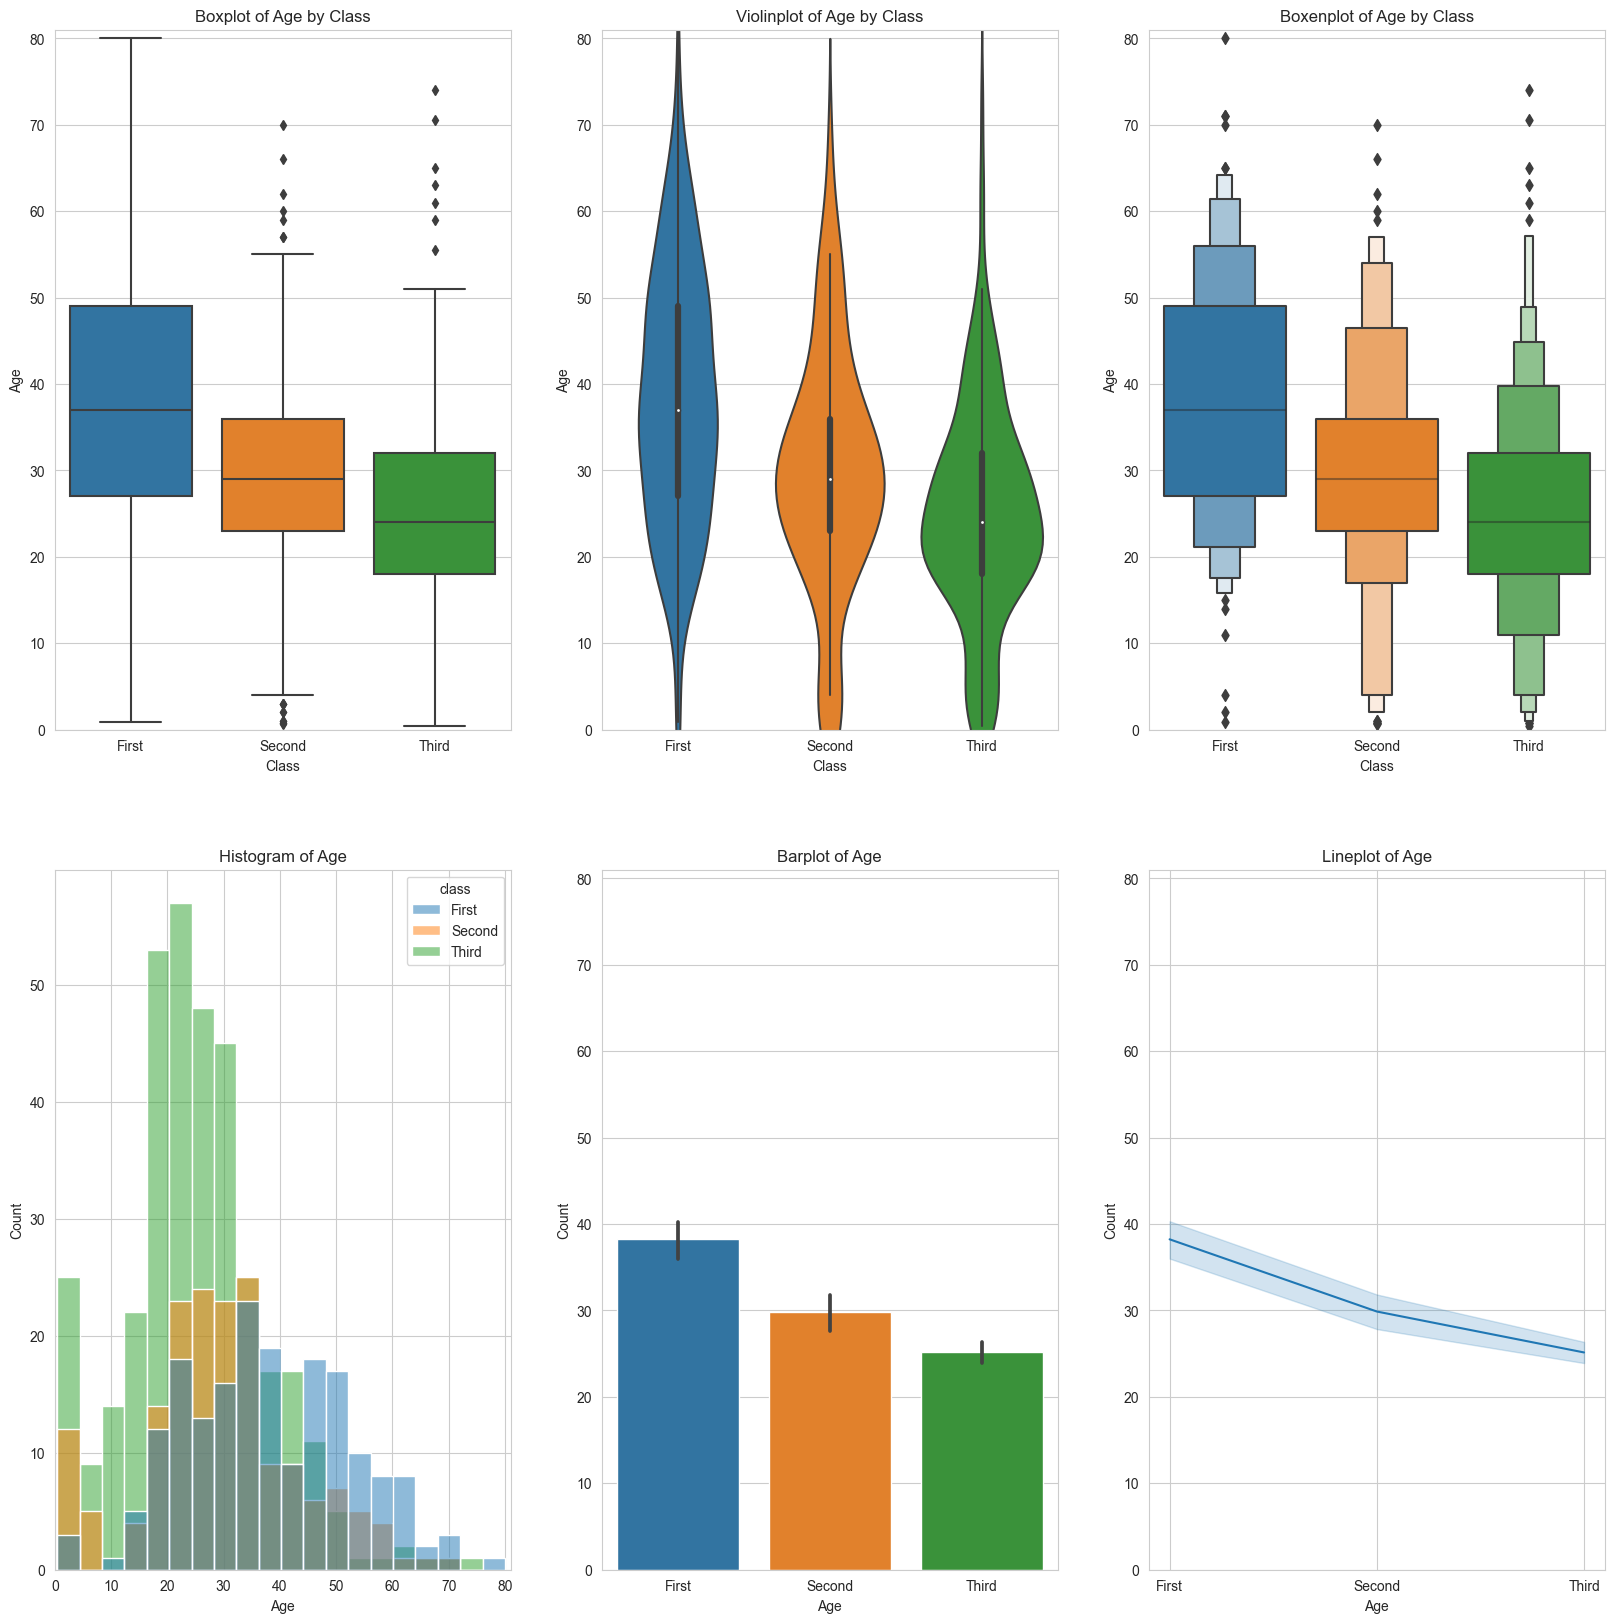

In [218]:
#Erstellen des Subplots
fig, ax = plt.subplots(2,3, figsize=(20,20))
# Boxplot auf Position 1 (oder 0 in Python)
sns.boxplot(x="class", y="age", data=df, ax=ax[0][0])
ax[0][0].set_title("Boxplot of Age by Class")
ax[0][0].set_xlabel("Class")
ax[0][0].set_ylabel("Age")
ax[0][0].set_ylim([0,81])
# Violinplot auf auf Position 2
sns.violinplot(x="class", y="age", data=df, ax=ax[0][1])
ax[0][1].set_title("Violinplot of Age by Class")
ax[0][1].set_xlabel("Class")
ax[0][1].set_ylabel("Age")
ax[0][1].set_ylim([0,81])
# Boxenplot auf Position 3
sns.boxenplot(x="class", y="age", data=df, ax=ax[0][2])
ax[0][2].set_title("Boxenplot of Age by Class")
ax[0][2].set_xlabel("Class")
ax[0][2].set_ylabel("Age")
ax[0][2].set_ylim([0,81])
# Histogramm auf Position 4
sns.histplot(hue="class", x="age", data=df, ax=ax[1][0])
ax[1][0].set_title("Histogram of Age")
ax[1][0].set_xlabel("Age")
ax[1][0].set_ylabel("Count")
ax[1][0].set_xlim([0,81])
# Barplot auf Position 5
sns.barplot(x="class", y="age", data=df, ax=ax[1][1])
ax[1][1].set_title("Barplot of Age")
ax[1][1].set_xlabel("Age")
ax[1][1].set_ylabel("Count")
ax[1][1].set_ylim([0,81])
# Lineplot auf Position 6
sns.lineplot(x="class", y="age", data=df, ax=ax[1][2])
ax[1][2].set_title("Lineplot of Age")
ax[1][2].set_xlabel("Age")
ax[1][2].set_ylabel("Count")
ax[1][2].set_ylim([0,81])